In [260]:
import pandas as pd
import glob,os
from easydict import EasyDict as edict
import re
import geopandas as gpd
import numpy as np
import geopandas as gpd
import rasterio
from rasterio import features
import numpy as np

In [277]:
df = pd.read_csv(r"H:\结果数据\OD流量\福州\9月\Timing_9_9.csv")
df

,O_id,D_id,time,flow
0,52,11476,22,1
1,52,11476,30,3
2,52,11476,31,1
3,52,157361,27,1
4,52,188917,30,1
...,...,...,...,...
2456527,365519,365519,64,1
2456528,365573,364718,78,1
2456529,365573,365276,75,1
2456530,365780,365216,63,1


In [ ]:
# 去除相同点
# df = df[df['O_id']!=df['D_id']]

In [279]:
max(df['O_id'])

365952

In [280]:
sum(df['flow'])

2107238

<Axes: xlabel='time', ylabel='flow'>

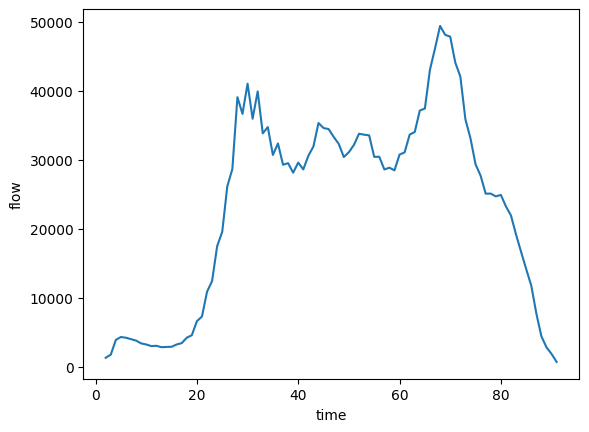

In [281]:
import seaborn as sns
sns.lineplot(
    x='time', 
    y='flow', 
    data=df.groupby('time')['flow'].sum().reset_index()
)

C:\Users\lmq\AppData\Local\Temp\ipykernel_50120\3872309683.py:60: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lmq\AppData\Local\Temp\ipykernel_50120\3872309683.py:60: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lmq\AppData\Local\Temp\ipykernel_50120\3872309683.py:60: UserWarning: Glyph 27573 (\N{CJK UNIFIED IDEOGRAPH-6BB5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lmq\AppData\Local\Temp\ipykernel_50120\3872309683.py:60: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lmq\AppData\Local\Temp\ipykernel_50120\3872309683.py:60: UserWarning: Glyph 38047 (\N{CJK UNIFIED IDEOGRAPH-949F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lmq\AppData\Local\Temp\ipykernel_50120\3872309683.py:60: UserWarning: Glyph 38548 (\N{CJK UNIFIE

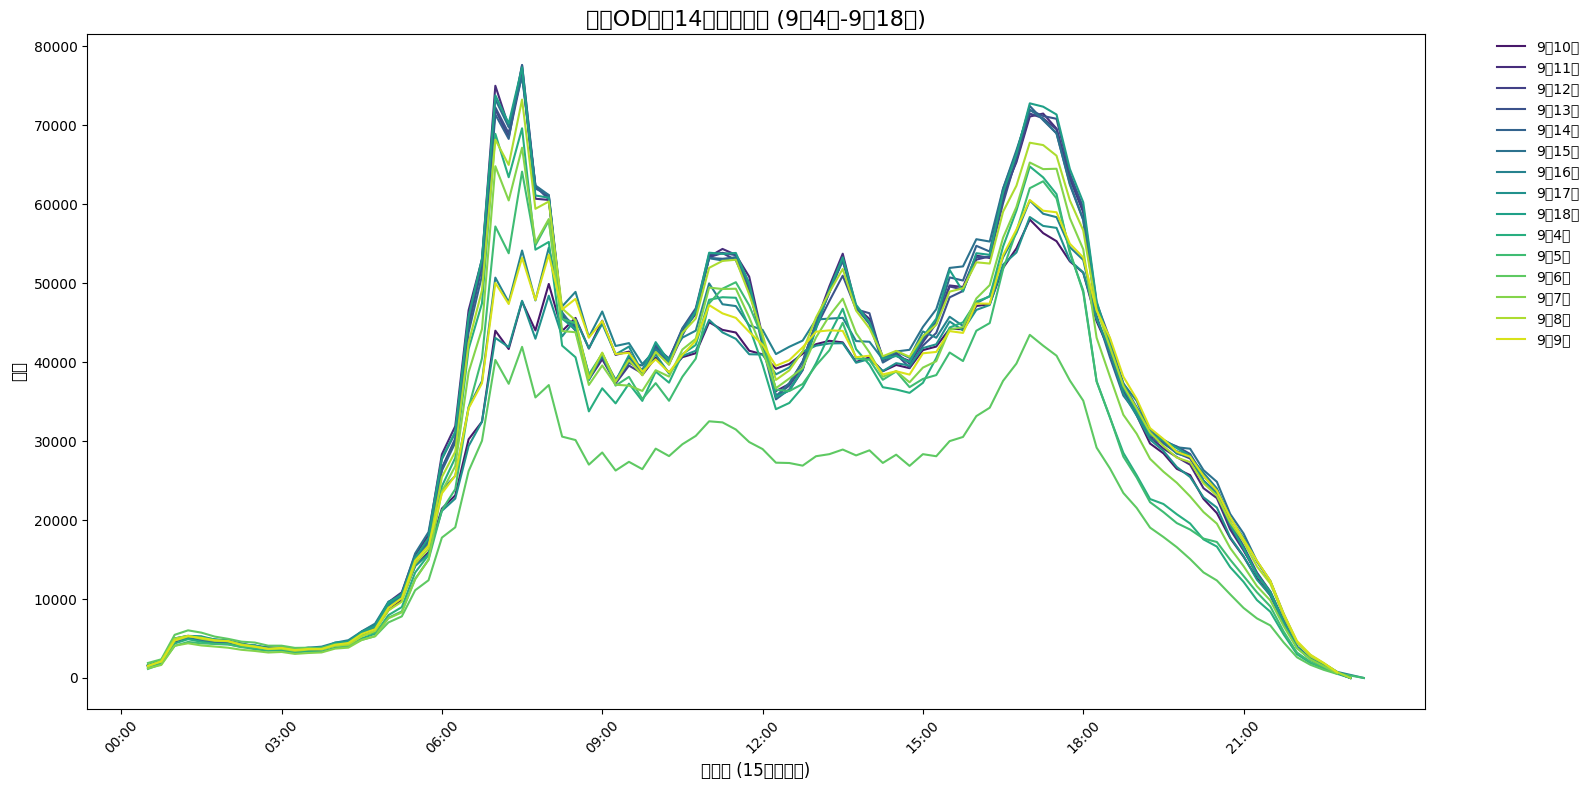

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# 1. 准备数据
dates = [f"9_{day}" for day in range(4, 19)]  # 9月4日-9月18日
all_data = pd.DataFrame()

# 合并14天数据，添加日期列
for date in dates:
    df = pd.read_csv(rf"H:\结果数据\OD流量\福州\9月\Timing_{date}.csv")
    df['date'] = f'9月{date.split("_")[1]}日'  # 添加可读日期标签
    all_data = pd.concat([all_data, df])

# 2. 聚合每日各时段总流量
daily_flow = all_data.groupby(['date', 'time'])['flow'].sum().reset_index()

# 3. 绘制14条曲线
plt.figure(figsize=(16, 8))

# 使用Seaborn的hue参数自动区分日期
sns.lineplot(
    x='time', 
    y='flow', 
    hue='date',
    data=daily_flow,
    palette='viridis',  # 使用14种不同颜色
    linewidth=1.5,
    estimator=None,     # 不自动聚合
    legend='full'       # 显示完整图例
)

# 4. 美化图形
plt.title('福州OD流量14日对比趋势 (9月4日-9月18日)', fontsize=16)
plt.xlabel('时间段 (15分钟间隔)', fontsize=12)
plt.ylabel('流量', fontsize=12)

# 设置x轴刻度（每3小时）
plt.xticks(
    ticks=np.arange(0, 96, 12),
    labels=[f"{h:02d}:00" for h in range(0, 24, 3)],
    rotation=45
)

# # 标注早晚高峰区域
# plt.axvspan(28, 36, color='orange', alpha=0.1, label='早高峰 (7:00-9:00)')
# plt.axvspan(68, 76, color='red', alpha=0.1, label='晚高峰 (17:00-19:00)')

# 调整图例
plt.legend(
    bbox_to_anchor=(1.05, 1),  # 将图例移到右侧
    loc='upper left',
    borderaxespad=0,
    frameon=False
)

# 5. 保存输出
plt.tight_layout()
plt.savefig('福州_14日OD流量曲线对比.png', dpi=300, bbox_inches='tight')
plt.show()

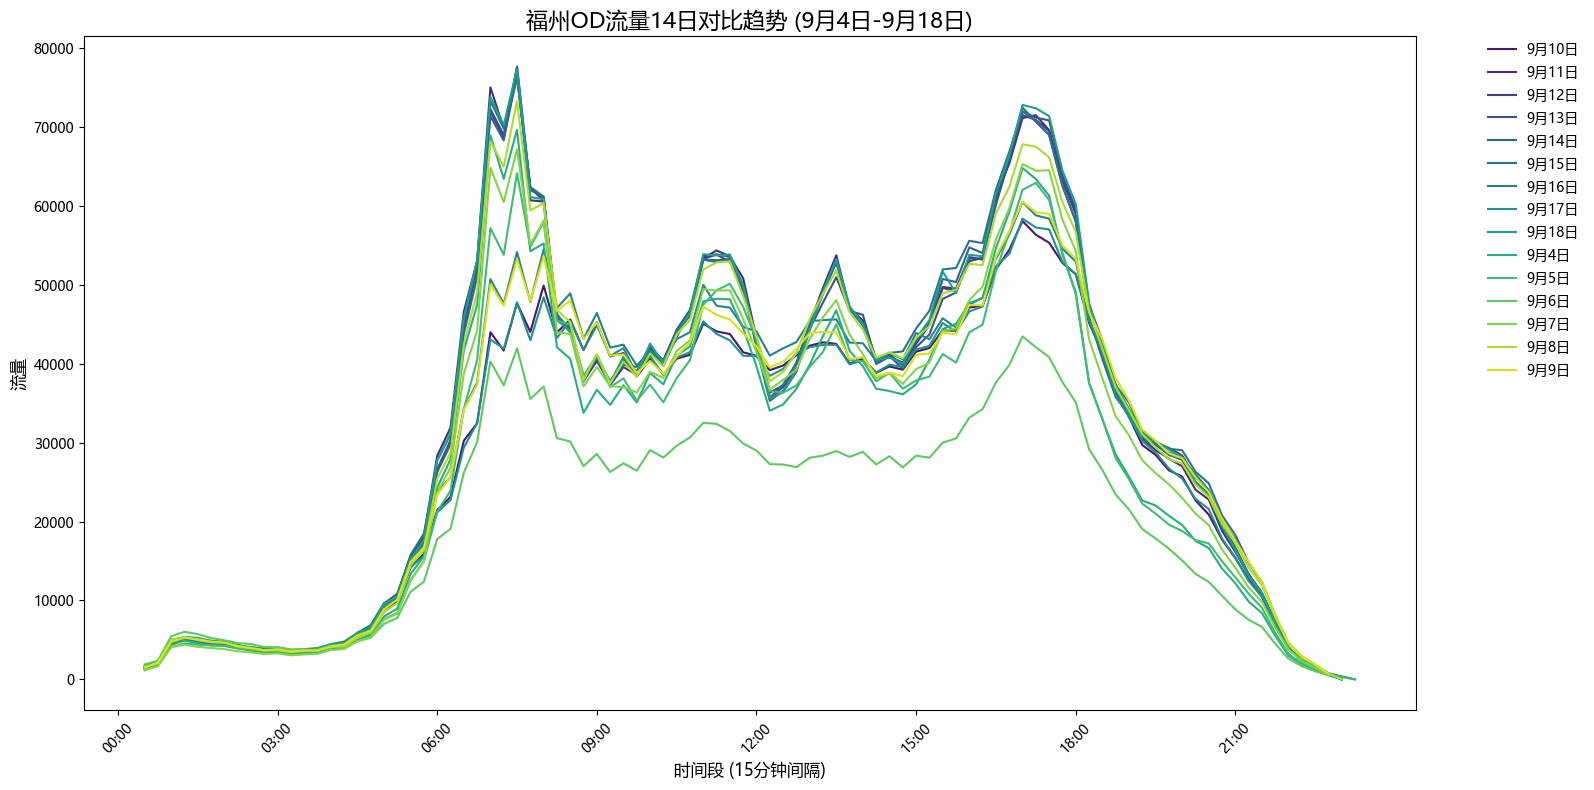

In [284]:
# 3. 绘制14条曲线
plt.figure(figsize=(16, 8))

# 使用Seaborn的hue参数自动区分日期
sns.lineplot(
    x='time', 
    y='flow', 
    hue='date',
    data=daily_flow,
    palette='viridis',  # 使用14种不同颜色
    linewidth=1.5,
    estimator=None,     # 不自动聚合
    legend='full'       # 显示完整图例
)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号乱码
# 4. 美化图形
plt.title('福州OD流量14日对比趋势 (9月4日-9月18日)', fontsize=16)
plt.xlabel('时间段 (15分钟间隔)', fontsize=12)
plt.ylabel('流量', fontsize=12)

# 设置x轴刻度（每3小时）
plt.xticks(
    ticks=np.arange(0, 96, 12),
    labels=[f"{h:02d}:00" for h in range(0, 24, 3)],
    rotation=45
)

# 调整图例
plt.legend(
    bbox_to_anchor=(1.05, 1),  # 将图例移到右侧
    loc='upper left',
    borderaxespad=0,
    frameon=False
)

# 5. 保存输出
plt.tight_layout()
plt.savefig('福州_14日OD流量曲线对比.png', dpi=300, bbox_inches='tight')
plt.show()

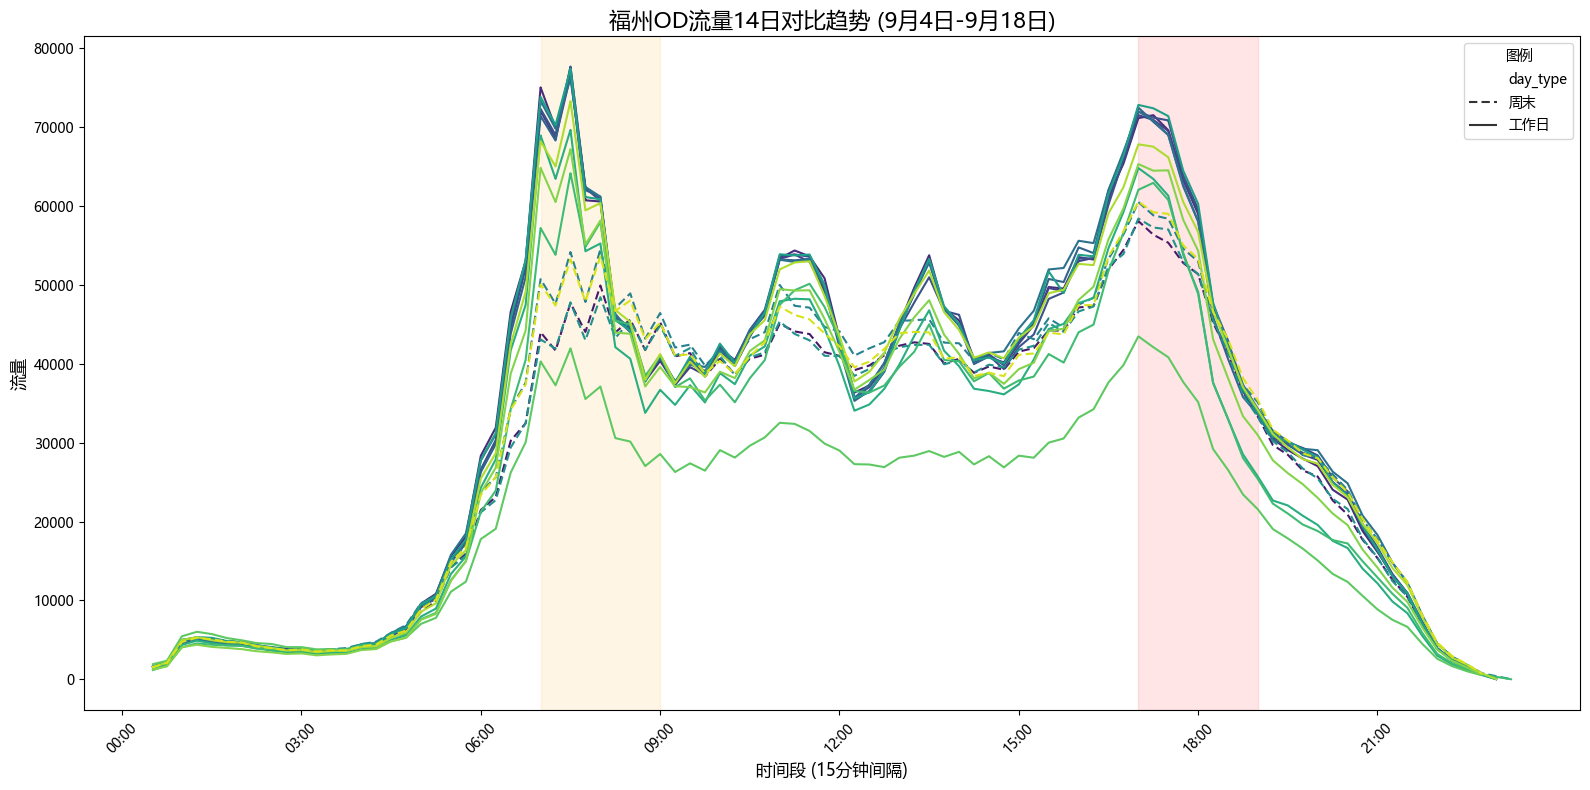

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# 1. 设置中文显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 加载数据并标记周末
dates = [f"9_{day}" for day in range(4, 19)]  # 9月4日-9月18日
all_data = pd.DataFrame()

for date in dates:
    df = pd.read_csv(rf"H:\结果数据\OD流量\福州\9月\Timing_{date}.csv")
    day = int(date.split('_')[1])
    date_obj = datetime(2023, 9, day)
    weekday = date_obj.weekday()  # 0-6对应周一到周日
    df['date'] = f'9月{day}日'
    df['weekend'] = (weekday >= 5)  # 标记周六周日
    df['day_type'] = np.where(weekday >= 5, '周末', '工作日')  # 新增分类列
    all_data = pd.concat([all_data, df])

# 3. 创建画布
plt.figure(figsize=(16, 8))

# 4. 绘制所有曲线，按day_type区分样式
sns.lineplot(
    x='time', 
    y='flow', 
    hue='date',
    style='day_type',  # 使用新增的分类列
    data=all_data.groupby(['date', 'time', 'day_type'])['flow'].sum().reset_index(),
    palette='viridis',  # 统一颜色
    linewidth=1.5,
    dashes={'工作日': (1,0), '周末': (4,2)},  # 指定线型
    estimator=None
)

# 5. 手动调整图例
handles, labels = plt.gca().get_legend_handles_labels()
# 保留日期图例和day_type图例
plt.legend(handles[-3:], labels[-3:], title='图例')

# 6. 美化图形
plt.title('福州OD流量14日对比趋势 (9月4日-9月18日)', fontsize=16)
plt.xlabel('时间段 (15分钟间隔)', fontsize=12)
plt.ylabel('流量', fontsize=12)

# 设置x轴刻度（每3小时）
plt.xticks(
    ticks=np.arange(0, 96, 12),
    labels=[f"{h:02d}:00" for h in range(0, 24, 3)],
    rotation=45
)

# 标注早晚高峰
plt.axvspan(28, 36, color='orange', alpha=0.1, label='早高峰 (7:00-9:00)')
plt.axvspan(68, 76, color='red', alpha=0.1, label='晚高峰 (17:00-19:00)')

# 7. 保存输出
plt.tight_layout()
plt.savefig('福州_14日OD流量曲线对比_周末区分.png', dpi=300, bbox_inches='tight')
plt.show()

In [222]:
# 时间范围
print(min(df['time']), max(df['time']))
print(min(df['flow']), max(df['flow']))

2 93
1 99


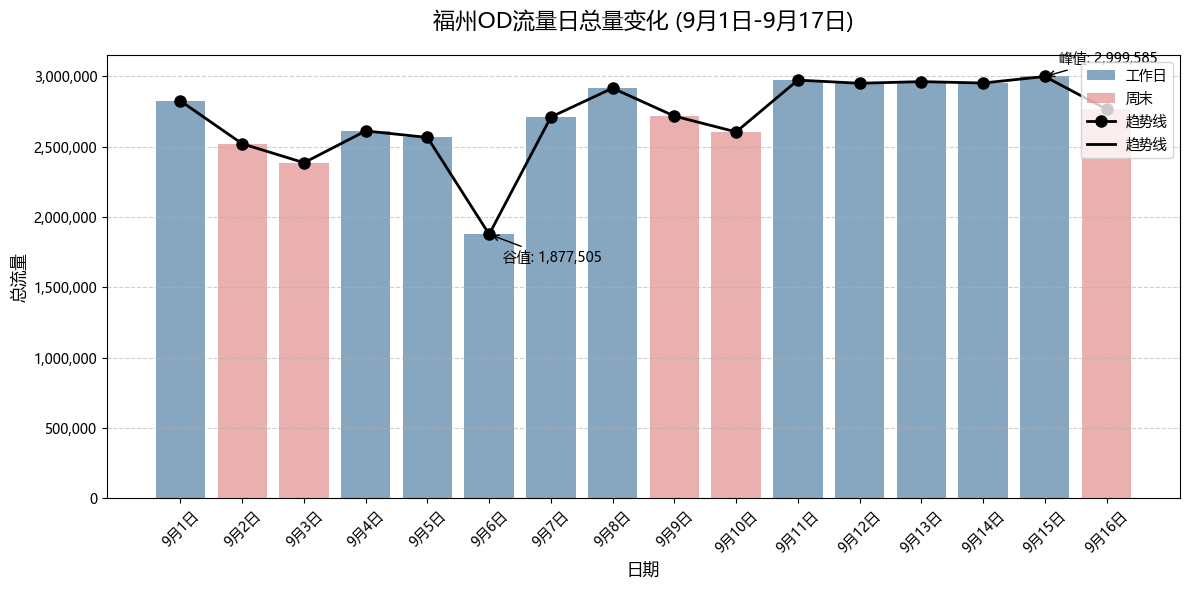

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# 1. 设置中文显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 加载数据并计算日总量
dates = [f"9_{day}" for day in range(1, 17)]  # 9月4日-9月18日
daily_totals = []

for date in dates:
    df = pd.read_csv(rf"H:\结果数据\OD流量\福州\9月\Timing_{date}.csv")
    day = int(date.split('_')[1])
    date_obj = datetime(2023, 9, day)
    weekday = date_obj.weekday()  # 0-6对应周一到周日
    
    daily_totals.append({
        'date': f'9月{day}日',
        'date_obj': date_obj,  # 用于排序
        'total_flow': df['flow'].sum(),
        'weekday': weekday,
        'day_type': '周末' if weekday >= 5 else '工作日'
    })

# 转换为DataFrame并按日期排序
daily_df = pd.DataFrame(daily_totals).sort_values('date_obj')

# 3. 创建画布
plt.figure(figsize=(12, 6))

# 4. 绘制柱状图+趋势线
ax = sns.barplot(
    x='date',
    y='total_flow',
    hue='day_type',
    data=daily_df,
    palette={'工作日': 'steelblue', '周末': 'lightcoral'},
    alpha=0.7
)

# 添加趋势线（连接柱顶中点）
ax.plot(
    range(len(daily_df)),
    daily_df['total_flow'],
    color='black',
    marker='o',
    markersize=8,
    linewidth=2,
    label='趋势线'
)

# 5. 标注特殊点（最高/最低流量）
max_idx = daily_df['total_flow'].idxmax()
min_idx = daily_df['total_flow'].idxmin()
ax.annotate(f'峰值: {daily_df.loc[max_idx, "total_flow"]:,}',
            xy=(max_idx, daily_df.loc[max_idx, "total_flow"]),
            xytext=(10, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))
ax.annotate(f'谷值: {daily_df.loc[min_idx, "total_flow"]:,}',
            xy=(min_idx, daily_df.loc[min_idx, "total_flow"]),
            xytext=(10, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))

# 6. 美化图形
plt.title('福州OD流量日总量变化 (9月1日-9月17日)', fontsize=16, pad=20)
plt.xlabel('日期', fontsize=12)
plt.ylabel('总流量', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 格式化y轴标签（千位分隔）
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# 7. 图例和布局
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles + [plt.Line2D([0], [0], color='black', linewidth=2)],
           labels + ['趋势线'],
           loc='upper right')

plt.tight_layout()
plt.savefig('福州_14日OD总量变化.png', dpi=300, bbox_inches='tight')
plt.show()

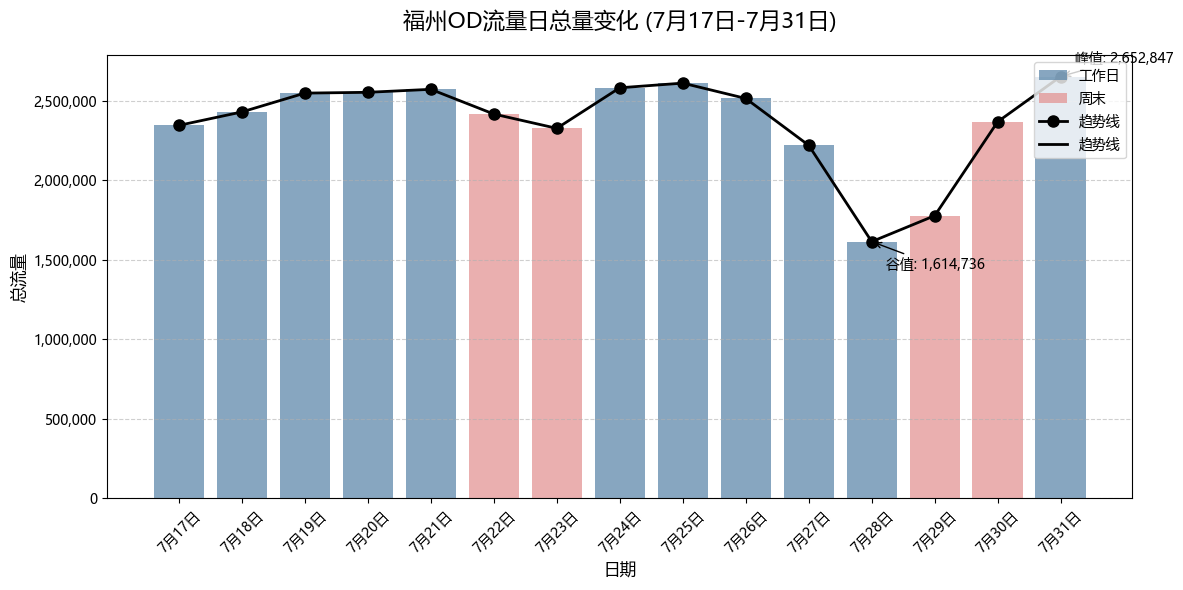

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# 1. 设置中文显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 加载数据并计算日总量
dates = [f"7_{day}" for day in range(17, 32)]  # 9月4日-9月18日
daily_totals = []

for date in dates:
    df = pd.read_csv(rf"H:\结果数据\OD流量\福州\7月\Timing_{date}.csv")
    day = int(date.split('_')[1])
    date_obj = datetime(2023, 7, day)
    weekday = date_obj.weekday()  # 0-6对应周一到周日
    
    daily_totals.append({
        'date': f'7月{day}日',
        'date_obj': date_obj,  # 用于排序
        'total_flow': df['flow'].sum(),
        'weekday': weekday,
        'day_type': '周末' if weekday >= 5 else '工作日'
    })

# 转换为DataFrame并按日期排序
daily_df = pd.DataFrame(daily_totals).sort_values('date_obj')

# 3. 创建画布
plt.figure(figsize=(12, 6))

# 4. 绘制柱状图+趋势线
ax = sns.barplot(
    x='date',
    y='total_flow',
    hue='day_type',
    data=daily_df,
    palette={'工作日': 'steelblue', '周末': 'lightcoral'},
    alpha=0.7
)

# 添加趋势线（连接柱顶中点）
ax.plot(
    range(len(daily_df)),
    daily_df['total_flow'],
    color='black',
    marker='o',
    markersize=8,
    linewidth=2,
    label='趋势线'
)

# 5. 标注特殊点（最高/最低流量）
max_idx = daily_df['total_flow'].idxmax()
min_idx = daily_df['total_flow'].idxmin()
ax.annotate(f'峰值: {daily_df.loc[max_idx, "total_flow"]:,}',
            xy=(max_idx, daily_df.loc[max_idx, "total_flow"]),
            xytext=(10, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))
ax.annotate(f'谷值: {daily_df.loc[min_idx, "total_flow"]:,}',
            xy=(min_idx, daily_df.loc[min_idx, "total_flow"]),
            xytext=(10, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))

# 6. 美化图形
plt.title('福州OD流量日总量变化 (7月17日-7月31日)', fontsize=16, pad=20)
plt.xlabel('日期', fontsize=12)
plt.ylabel('总流量', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 格式化y轴标签（千位分隔）
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# 7. 图例和布局
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles + [plt.Line2D([0], [0], color='black', linewidth=2)],
           labels + ['趋势线'],
           loc='upper right')

plt.tight_layout()
plt.savefig('福州_14日OD总量变化.png', dpi=300, bbox_inches='tight')
plt.show()

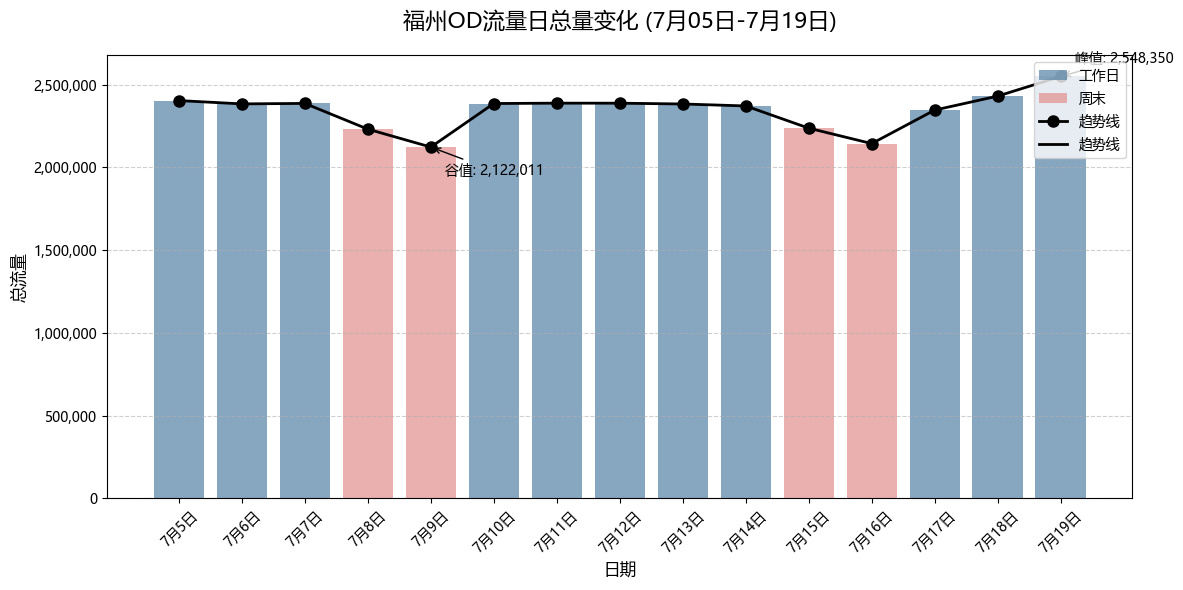

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# 1. 设置中文显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 加载数据并计算日总量
dates = [f"7_{day}" for day in range(5, 20)]  # 9月4日-9月18日
daily_totals = []

for date in dates:
    df = pd.read_csv(rf"H:\结果数据\OD流量\福州\7月\Timing_{date}.csv")
    day = int(date.split('_')[1])
    date_obj = datetime(2023, 7, day)
    weekday = date_obj.weekday()  # 0-6对应周一到周日
    
    daily_totals.append({
        'date': f'7月{day}日',
        'date_obj': date_obj,  # 用于排序
        'total_flow': df['flow'].sum(),
        'weekday': weekday,
        'day_type': '周末' if weekday >= 5 else '工作日'
    })

# 转换为DataFrame并按日期排序
daily_df = pd.DataFrame(daily_totals).sort_values('date_obj')

# 3. 创建画布
plt.figure(figsize=(12, 6))

# 4. 绘制柱状图+趋势线
ax = sns.barplot(
    x='date',
    y='total_flow',
    hue='day_type',
    data=daily_df,
    palette={'工作日': 'steelblue', '周末': 'lightcoral'},
    alpha=0.7
)

# 添加趋势线（连接柱顶中点）
ax.plot(
    range(len(daily_df)),
    daily_df['total_flow'],
    color='black',
    marker='o',
    markersize=8,
    linewidth=2,
    label='趋势线'
)

# 5. 标注特殊点（最高/最低流量）
max_idx = daily_df['total_flow'].idxmax()
min_idx = daily_df['total_flow'].idxmin()
ax.annotate(f'峰值: {daily_df.loc[max_idx, "total_flow"]:,}',
            xy=(max_idx, daily_df.loc[max_idx, "total_flow"]),
            xytext=(10, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))
ax.annotate(f'谷值: {daily_df.loc[min_idx, "total_flow"]:,}',
            xy=(min_idx, daily_df.loc[min_idx, "total_flow"]),
            xytext=(10, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle='->'))

# 6. 美化图形
plt.title('福州OD流量日总量变化 (7月05日-7月19日)', fontsize=16, pad=20)
plt.xlabel('日期', fontsize=12)
plt.ylabel('总流量', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 格式化y轴标签（千位分隔）
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# 7. 图例和布局
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles + [plt.Line2D([0], [0], color='black', linewidth=2)],
           labels + ['趋势线'],
           loc='upper right')

plt.tight_layout()
plt.savefig('福州_14日OD总量变化.png', dpi=300, bbox_inches='tight')
plt.show()

In [223]:
# 假设原始数据框为df
df['hour'] = df['time'] // 4  # 每4个15分钟段=1小时
hourly_od = df.groupby(['O_id', 'D_id', 'hour'])['flow'].sum().reset_index()
hourly_od

,O_id,D_id,hour,flow
0,55,55,16,1
1,55,66,10,1
2,63,52,2,1
3,63,62,15,1
4,63,89,11,1
...,...,...,...,...
2055462,365573,332136,17,1
2055463,365946,365952,15,1
2055464,365952,365946,9,1
2055465,365952,365949,9,1


<Axes: xlabel='hour'>

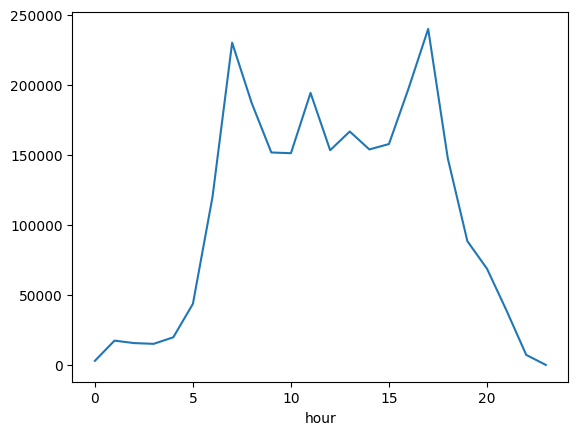

In [224]:
# 小时流量
hourly_od.groupby("hour")['flow'].sum().plot()

In [225]:
hourly_od.groupby("hour")['flow'].sum()

hour
0       2922
1      17337
2      15580
3      15047
4      19725
5      43609
6     119923
7     229941
8     186822
9     151600
10    151077
11    194111
12    153209
13    166570
14    153764
15    157628
16    197312
17    239766
18    147472
19     88300
20     68665
21     38731
22      7178
23         1
Name: flow, dtype: int64

In [226]:
print(min(hourly_od['flow']), max(hourly_od['flow']))
print(min(hourly_od['hour']), max(hourly_od['hour']))
hourly_od[hourly_od['flow']==max(hourly_od['flow'])]

1 254
0 23


,O_id,D_id,hour,flow
1401143,194834,195432,11,254


In [227]:
import networkx as nx

od_flows = hourly_od[hourly_od['hour']==7]
# 构建有向加权图
G = nx.from_pandas_edgelist(
    od_flows, 
    source='O_id', 
    target='D_id', 
    edge_attr='flow',
    create_using=nx.DiGraph
)

# 计算出入度差异
nodes = pd.DataFrame({
    'out_degree': dict(G.out_degree(weight='flow')),
    'in_degree': dict(G.in_degree(weight='flow'))
})
nodes['imbalance'] = (nodes['out_degree'] - nodes['in_degree']).abs()

# 标记异常节点（出入流量差异>3σ）
threshold = nodes['imbalance'].mean() + 3*nodes['imbalance'].std()
abnormal_nodes = nodes[nodes['imbalance'] > threshold]
abnormal_nodes

,out_degree,in_degree,imbalance
184715,7,126,119
186727,55,159,104
192031,22,159,137
10328,8,138,130
13483,7,81,74
...,...,...,...
255569,164,49,115
256588,196,41,155
290909,87,17,70
337944,6,59,53


In [228]:
od_flows

,O_id,D_id,hour,flow
10,85,112,7,1
23,101,101,7,1
28,110,184715,7,1
38,156,156,7,1
48,160,209,7,1
...,...,...,...,...
2055402,365207,365207,7,1
2055403,365229,365346,7,1
2055409,365276,365276,7,1
2055452,365438,365346,7,1


In [229]:
# 读取渔网文件
fishnet = gpd.read_file(r"E:\四大城市\格网\200\福州.shp")  # 假设包含id字段
fishnet

,FID,geometry
0,0,"POLYGON ((119.75793 25.29424, 119.75973 25.294..."
1,1,"POLYGON ((119.75973 25.29424, 119.76153 25.294..."
2,2,"POLYGON ((119.75738 25.29424, 119.75793 25.294..."
3,3,"POLYGON ((119.76153 25.29424, 119.76179 25.294..."
4,4,"POLYGON ((119.75793 25.29587, 119.75973 25.295..."
...,...,...
366045,366045,"POLYGON ((119.42556 26.63466, 119.42556 26.633..."
366046,366046,"POLYGON ((119.42915 26.63477, 119.42915 26.633..."
366047,366047,"POLYGON ((119.42376 26.63445, 119.42376 26.633..."
366048,366048,"POLYGON ((119.43274 26.63485, 119.43274 26.633..."


In [230]:
# 加载格网矢量并提取中心点
grid_centers = fishnet.set_index('FID')['geometry'].centroid  # 假设grid_id匹配O_id/D_id
grid_centers

C:\Users\lmq\AppData\Local\Temp\ipykernel_50120\1017244320.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid_centers = fishnet.set_index('FID')['geometry'].centroid  # 假设grid_id匹配O_id/D_id


FID
0          POINT (119.75895 25.2938)
1         POINT (119.76057 25.29375)
2         POINT (119.75775 25.29412)
3         POINT (119.76161 25.29409)
4         POINT (119.75883 25.29506)
                     ...            
366045    POINT (119.42468 26.63392)
366046    POINT (119.42826 26.63402)
366047    POINT (119.42289 26.63381)
366048    POINT (119.43185 26.63406)
366049    POINT (119.43364 26.63408)
Length: 366050, dtype: geometry

In [231]:
grid_centers.index

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       366040, 366041, 366042, 366043, 366044, 366045, 366046, 366047, 366048,
       366049],
      dtype='int64', name='FID', length=366050)

In [236]:
hourly_od_7 = hourly_od[hourly_od['hour']==7]
hourly_od_7['O_lon'] = hourly_od_7['O_id'].map(lambda x: grid_centers[x].x if x in grid_centers.index else None)
hourly_od_7['O_lat'] = hourly_od_7['O_id'].map(lambda x: grid_centers[x].y if x in grid_centers.index else None)
hourly_od_7['D_lon'] = hourly_od_7['D_id'].map(lambda x: grid_centers[x].x if x in grid_centers.index else None)
hourly_od_7['D_lat'] = hourly_od_7['D_id'].map(lambda x: grid_centers[x].y if x in grid_centers.index else None)

C:\Users\lmq\AppData\Local\Temp\ipykernel_50120\4061118598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_od_7['O_lon'] = hourly_od_7['O_id'].map(lambda x: grid_centers[x].x if x in grid_centers.index else None)
C:\Users\lmq\AppData\Local\Temp\ipykernel_50120\4061118598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_od_7['O_lat'] = hourly_od_7['O_id'].map(lambda x: grid_centers[x].y if x in grid_centers.index else None)
C:\Users\lmq\AppData\Local\Temp\ipykernel_50120\4061118598.py:4:

In [237]:
hourly_od_7

,O_id,D_id,hour,flow,O_lon,O_lat,D_lon,D_lat
10,85,112,7,1,119.692356,25.319419,119.692356,25.322667
23,101,101,7,1,119.690559,25.321043,119.690559,25.321043
28,110,184715,7,1,119.688763,25.322667,119.345606,26.051246
38,156,156,7,1,119.690559,25.332411,119.690559,25.332411
48,160,209,7,1,119.690559,25.334035,119.690559,25.337282
...,...,...,...,...,...,...,...,...
2055402,365207,365207,7,1,119.471370,26.611599,119.471370,26.611599
2055403,365229,365346,7,1,119.428251,26.611599,119.428251,26.614811
2055409,365276,365276,7,1,119.426455,26.613205,119.426455,26.613205
2055452,365438,365346,7,1,119.431844,26.616417,119.428251,26.614811


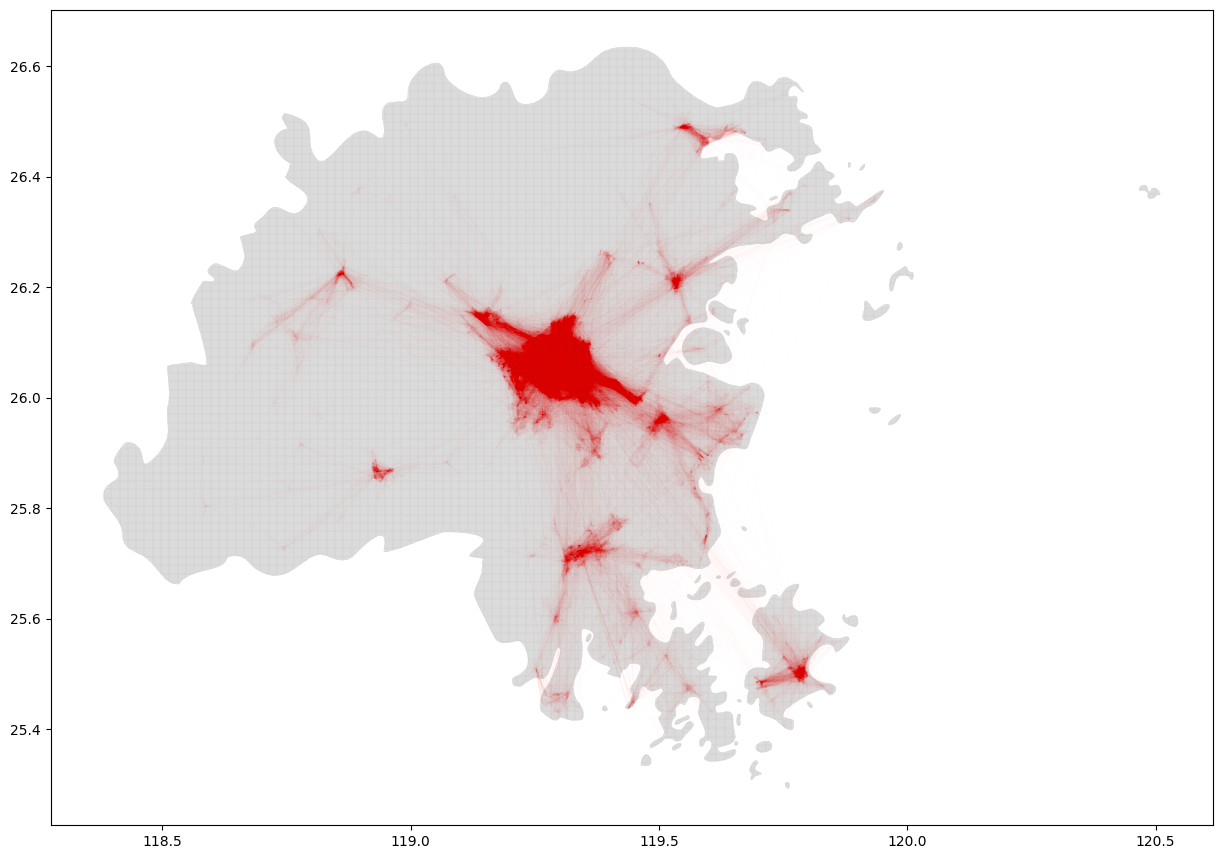

In [239]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

fig, ax = plt.subplots(figsize=(15, 12))

# 绘制格网底图
fishnet.boundary.plot(ax=ax, linewidth=0.2, color='lightgray')

# 批量绘制OD线（比逐条plot快100倍）
lines = [[(o_lon, o_lat), (d_lon, d_lat)] for o_lon, o_lat, d_lon, d_lat in 
         zip(hourly_od_7['O_lon'], hourly_od_7['O_lat'], hourly_od_7['D_lon'], hourly_od_7['D_lat'])]
lc = LineCollection(lines, linewidths=hourly_od_7['flow']/hourly_od_7['flow'].max()*0.5, 
                    colors='red', alpha=0.6)
ax.add_collection(lc)

plt.savefig('od_heatmap.png', dpi=300, bbox_inches='tight')

In [238]:
hourly_od_7.to_csv("E:\四大城市\OD\福州915_7_OD.csv",index=False)

In [117]:
# 假设od中的O_id对应渔网id
od_geo = fishnet.merge(
    hourly_od[hourly_od['hour']==7].groupby('D_id')['flow'].sum().reset_index(),
    left_on='FID', 
    right_on='D_id',
    how='left'
).fillna(0)
od_geo

,FID,geometry,D_id,flow
0,0,"POLYGON ((13331392.107 2911929.379, 13331592.1...",0.0,0.0
1,1,"POLYGON ((13331592.107 2911929.379, 13331792.1...",0.0,0.0
2,2,"POLYGON ((13331331.059 2911929.379, 13331392.1...",0.0,0.0
3,3,"POLYGON ((13331792.107 2911929.379, 13331821.1...",0.0,0.0
4,4,"POLYGON ((13331392.107 2912129.379, 13331592.1...",0.0,0.0
...,...,...,...,...
366045,366045,"POLYGON ((13294392.107 3077901.415, 13294392.1...",0.0,0.0
366046,366046,"POLYGON ((13294792.107 3077915.178, 13294792.1...",0.0,0.0
366047,366047,"POLYGON ((13294192.107 3077874.7, 13294192.107...",0.0,0.0
366048,366048,"POLYGON ((13295192.107 3077924.699, 13295192.1...",0.0,0.0


In [118]:
# 获取渔网边界
fishnet = fishnet.to_crs("ESRI:102113") # web mercator投影 84
bounds = fishnet.total_bounds
x_res = 200  # 分辨率100米
y_res = 200

# 计算行列数
width = int((bounds[2] - bounds[0]) / x_res)
height = int((bounds[3] - bounds[1]) / y_res)

# 初始化数组
raster_array = np.zeros((height, width), dtype=np.float32)

In [119]:
# 转换坐标系（确保与渔网一致）
od_geo = od_geo.to_crs(fishnet.crs)

# 生成(geometry, value)对
shapes = ((geom, value) for geom, value in zip(od_geo.geometry, od_geo['flow']))

# 栅格化
rasterized = features.rasterize(
    shapes,
    out_shape=raster_array.shape,
    transform=rasterio.transform.from_origin(
        west=bounds[0], 
        north=bounds[3], 
        xsize=x_res, 
        ysize=y_res
    ),
    fill=0
)

In [120]:
# 定义输出profile
profile = {
    'driver': 'GTiff',
    'dtype': 'float32',
    'width': width,
    'height': height,
    'count': 1,
    'crs': fishnet.crs,
    'nodata': 0,
    'transform': rasterio.transform.from_origin(
        bounds[0], bounds[3], x_res, y_res
    )
}

# 写入文件
with rasterio.open('D_7_raster.tif', 'w', **profile) as dst:
    dst.write(rasterized, 1)

In [121]:
max(od_geo['flow'])

338.0